# API food : clustering

In [1]:
import getpass
import pandas as pd
pd.set_option("display.max_columns", 0)

In [6]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


### step 4
1. input : user types 2 ingredients
2. output: app gives 10 proposal recipes
3. input: user choses 1 recipe out of the 10 (e.g. "risotto chicken")
4. output: model proposes a another similar recipe ("if you liked 'chicken risotto' I recommend you try 'paprika pasta')
    MODEL: recipe clustering based on nutrition , number of ingredient, number of steps, taste,  language processing ~

# Building model

### open recipe df


In [2]:
recipes_10000=pd.read_csv('spoonacular_recipes_7k.csv') 


## select features

## drop columns 
each of theses drops have been carefully justified, look at other jpy

In [7]:
#dropping the columns that wont be used for our analysis
#'Very popular' : can be useful as a group but not for clustering
drop_list=['sourceName','originalId', 'license','creditsText', 'image','imageType','spoonacularSourceUrl','sourceUrl',
           'gaps','cookingMinutes','preparationMinutes','cuisines','occasions','author','diets','sustainable', 'aggregateLikes', 
           'cheap','readyInMinutes', 'lowFodmap','vegan','instructions']
data=recipes_10000.drop(drop_list,axis=1)

In [8]:
data.head(3)

,vegetarian,glutenFree,dairyFree,veryHealthy,veryPopular,weightWatcherSmartPoints,healthScore,pricePerServing,extendedIngredients,id,title,servings,summary,dishTypes,analyzedInstructions,spoonacularScore
0,False,False,False,False,False,15,12,121.57,"[{'id': 10011355, 'aisle': 'Produce', 'image':...",657031,Potatoes Smothered W/ Egg Sauce (Cariucho),4,The recipe Potatoes Smothered with Egg Sauce (...,"['lunch', 'main course', 'main dish', 'dinner']","[{'name': '', 'steps': [{'number': 1, 'step': ...",59.014149
1,False,False,False,False,False,13,13,134.03,"[{'id': 1230, 'aisle': 'Milk, Eggs, Other Dair...",645732,Grilled Ham and Cheese French Toast For A Quic...,4,The recipe Grilled Ham and Cheese French Toast...,"['lunch', 'main course', 'main dish', 'dinner']","[{'name': '', 'steps': [{'number': 1, 'step': ...",60.525078
2,True,False,False,False,False,8,4,32.37,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",637161,Carrot and Banana Snacking Cake,8,Carrot and Banana Snacking Cake might be a goo...,['dessert'],"[{'name': '', 'steps': [{'number': 1, 'step': ...",42.399120


In [ ]:
data['dishTypes'].value_counts()
#KEEP it and transform it


## transform dishTypes

## Clustering

In [9]:
X_data = data[['vegetarian','glutenFree','dairyFree','veryHealthy','veryPopular','weightWatcherSmartPoints','healthScore','pricePerServing','spoonacularScore']]

In [10]:
## Alternative code to pickle for later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_data)
X_scaled = scaler.transform(X_data)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

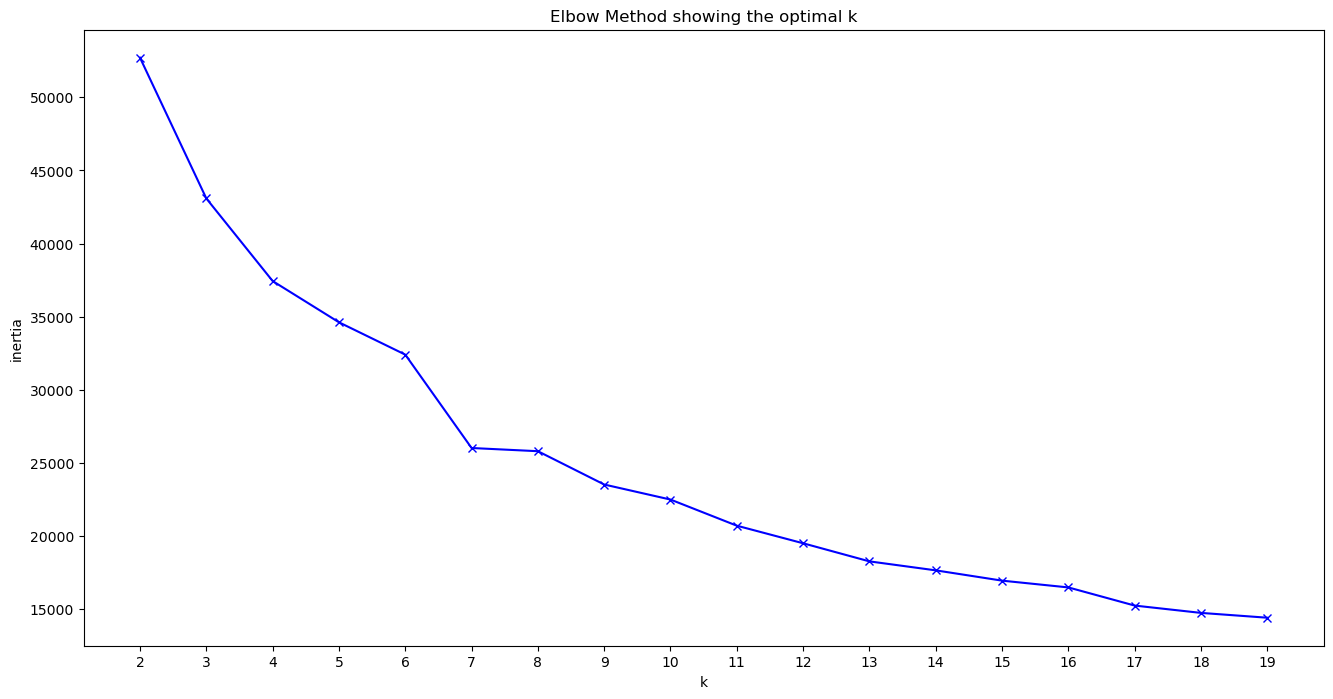

In [12]:
from sklearn.cluster import KMeans
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto',
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette score large playlist')

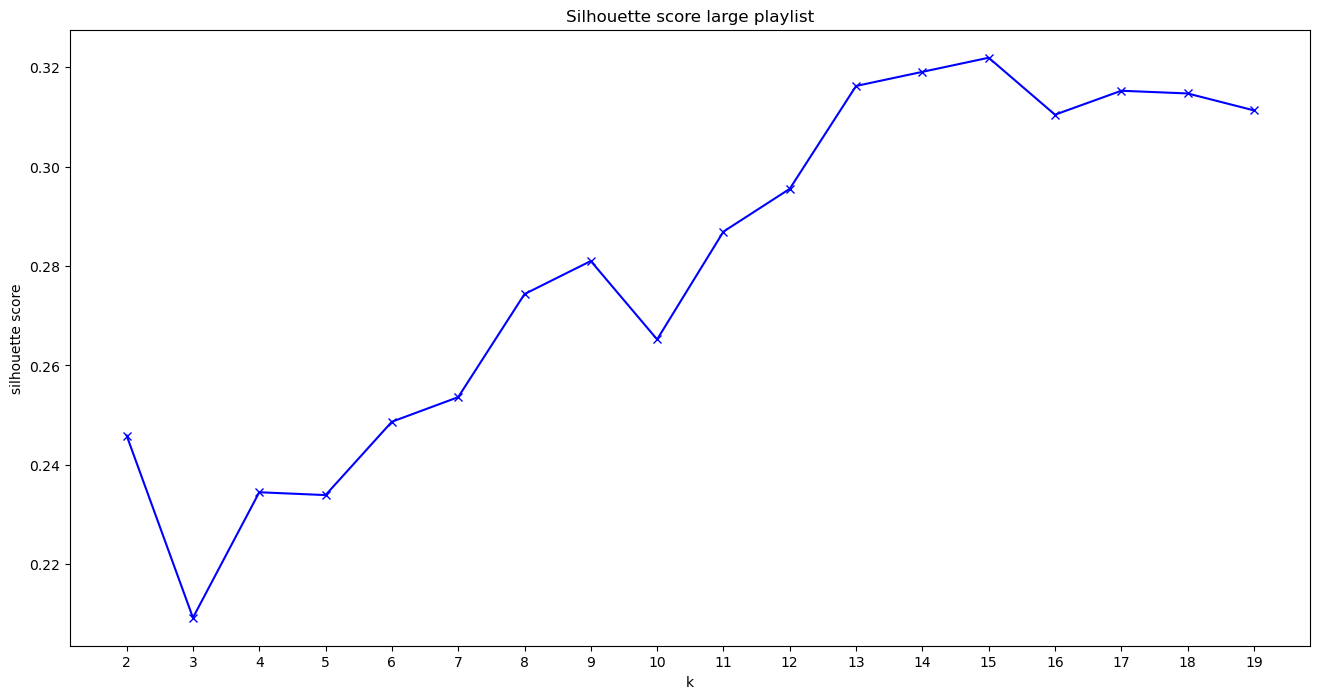

In [13]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score ')
# I chose 10 k

In [14]:
#optimal k is 10
kmeans = KMeans(n_clusters=10,
                init="random",
                n_init= 1, 
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

21721.276879585526


In [15]:
clusters = kmeans.predict(X_scaled)
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()
#clusters are not too imbalanced

0    1023
1     265
2     549
3     605
4    1493
5     753
6     640
7     906
8     237
9     829
Name: count, dtype: int64

In [16]:
data['cluster']=clusters
data

,vegetarian,glutenFree,dairyFree,veryHealthy,veryPopular,weightWatcherSmartPoints,healthScore,pricePerServing,extendedIngredients,id,title,servings,summary,dishTypes,analyzedInstructions,spoonacularScore,cluster
0,False,False,False,False,False,15,12,121.57,"[{'id': 10011355, 'aisle': 'Produce', 'image':...",657031,Potatoes Smothered W/ Egg Sauce (Cariucho),4,The recipe Potatoes Smothered with Egg Sauce (...,"['lunch', 'main course', 'main dish', 'dinner']","[{'name': '', 'steps': [{'number': 1, 'step': ...",59.014149,0
1,False,False,False,False,False,13,13,134.03,"[{'id': 1230, 'aisle': 'Milk, Eggs, Other Dair...",645732,Grilled Ham and Cheese French Toast For A Quic...,4,The recipe Grilled Ham and Cheese French Toast...,"['lunch', 'main course', 'main dish', 'dinner']","[{'name': '', 'steps': [{'number': 1, 'step': ...",60.525078,0
2,True,False,False,False,False,8,4,32.37,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",637161,Carrot and Banana Snacking Cake,8,Carrot and Banana Snacking Cake might be a goo...,['dessert'],"[{'name': '', 'steps': [{'number': 1, 'step': ...",42.399120,4
3,False,False,False,False,False,27,8,107.36,"[{'id': 9003, 'aisle': 'Produce', 'image': 'ap...",633428,Baked Apple Pancake,4,"You can never have too many breakfast recipes,...","['morning meal', 'brunch', 'breakfast']","[{'name': '', 'steps': [{'number': 1, 'step': ...",51.477009,3
4,False,True,True,False,False,17,16,119.98,"[{'id': 1005091, 'aisle': 'Meat', 'image': 'ch...",663824,Trinidadian Chicken Potato Curry,4,If you have about <b>45 minutes</b> to spend i...,"['lunch', 'main course', 'main dish', 'dinner']","[{'name': '', 'steps': [{'number': 1, 'step': ...",70.604698,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,False,False,True,False,False,5,0,28.15,"[{'id': 1039003, 'aisle': 'Produce', 'image': ...",632573,Apple Pie Bars,24,The recipe Apple Pie Bars could satisfy your A...,['dessert'],"[{'name': '', 'steps': [{'number': 1, 'step': ...",10.932211,4
7296,False,True,False,False,False,24,12,220.34,"[{'id': 2048, 'aisle': 'Oil, Vinegar, Salad Dr...",633372,Bacon-Wrapped Meatloaf,6,Bacon-Wrapped Meatloaf might be just the main ...,"['lunch', 'main course', 'main dish', 'dinner']","[{'name': '', 'steps': [{'number': 1, 'step': ...",63.994400,5
7297,False,True,False,False,False,12,1,110.62,"[{'id': 1123, 'aisle': 'Milk, Eggs, Other Dair...",642413,English Berry Trifle,16,English Berry Trifle requires roughly <b>5 hou...,['dessert'],"[{'name': 'For curd', 'steps': [{'number': 1, ...",28.327370,6
7298,False,True,True,False,False,8,32,259.00,"[{'id': 1055062, 'aisle': 'Meat', 'image': 'ch...",645753,Grilled Lemon Garlic Chicken,4,Grilled Lemon Garlic Chicken could be just the...,"['lunch', 'main course', 'main dish', 'dinner']","[{'name': '', 'steps': [{'number': 1, 'step': ...",84.130028,9


# Save

In [17]:
#now that I have my clusters, I save it in csv
#data.to_csv('recipes_w_clusters.csv', index=False)